In [1]:
import numpy as np
import pandas as pd
import pingouin as pin

In [57]:
import opendatasets as od

# Chi-square Test Of Independence

In [58]:
od.download('https://www.kaggle.com/datasets/anandshaw2001/customer-churn-dataset/data') 

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  saicakella


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/anandshaw2001/customer-churn-dataset


100%|██████████| 262k/262k [00:00<00:00, 290kB/s]

In [59]:
churn = pd.read_csv('./customer-churn-dataset/Churn_Modelling.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

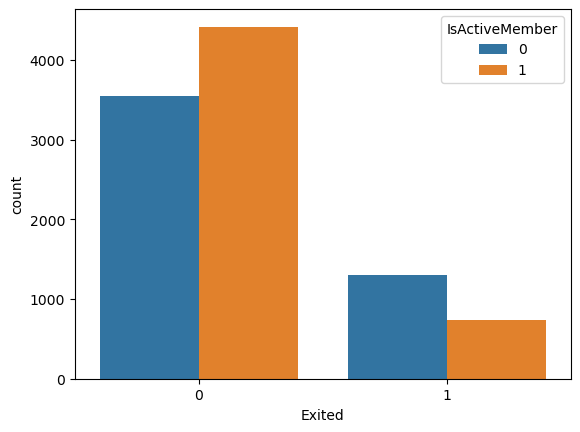

In [73]:
sns.countplot(churn,x='Exited',hue='IsActiveMember')

**Is churn independent of active status?**

In [74]:
test = pin.chi2_independence(churn,'Exited','IsActiveMember')

In [75]:
test[0]

IsActiveMember,0,1
Exited,,
0,3861.2587,4101.7413
1,987.7413,1049.2587


In [76]:
test[1]

IsActiveMember,0,1
Exited,,
0,3547.5,4415.5
1,1301.5,735.5


In [77]:
test[2]

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,242.985342,1.0,8.785858e-55,0.155880,1.0
1,cressie-read,0.666667,243.311030,1.0,7.460594e-55,0.155984,1.0
2,log-likelihood,0.000000,245.039497,1.0,3.132684e-55,0.156537,1.0
3,freeman-tukey,-0.500000,247.308133,1.0,1.003006e-55,0.157260,1.0
4,mod-log-likelihood,-1.000000,250.448325,1.0,2.073486e-56,0.158256,1.0
5,neyman,-2.000000,259.531960,1.0,2.170391e-58,0.161100,1.0


**The test indicates that there is a strong relation between the customer's active status and their churn status**

# Chi-square Goodness-Of-Fit

<div>
    <img src='./images/chi2.png' width=700>
</div>

In [87]:
arrivals = pd.DataFrame({'observed':[7,18,25,17,12,5]})
arrivals

,observed
0,7
1,18
2,25
3,17
4,12
5,5


H0: The frequency distribution is Poisson<br>
H1: The frequency distribution is not Poisson

The degrees of freedom are k - 2 = 6 - 1 - 1 = 4 because the expected distribution is Poisson.<br>
An extra degree of freedom is lost, because the value of lambdamust be calculated by using the observed sample data

In [83]:
df = 4
alpha = 0.05

In [84]:
from scipy import stats

In [85]:
critical_value = stats.chi2.ppf(1-alpha,df)
critical_value

9.487729036781154

**The decision rule is to reject the null hypothesis if the
observed chi-square is greater than the critical_value**

In [86]:
lambda_ = ((0*7)+(1*18)+(2*25)+(3*17)+(4*12)+(5*5)) / (7+18+25+17+12+5)
lambda_

2.2857142857142856

In [91]:
expected = [stats.poisson.pmf(0,lambda_)*84,
            stats.poisson.pmf(1,lambda_)*84,
            stats.poisson.pmf(2,lambda_)*84,
            stats.poisson.pmf(3,lambda_)*84,
            stats.poisson.pmf(4,lambda_)*84,
            (1-stats.poisson.cdf(4,lambda_))*84]

In [92]:
arrivals.insert(1,'expected',expected)
arrivals

,observed,expected
0,7,8.542917
1,18,19.526667
2,25,22.316191
3,17,17.002812
4,12,9.715893
5,5,6.895519


In [94]:
arrivals.observed.sum()

84

In [95]:
arrivals.expected.sum()

84.0

In [96]:
arrivals['(observed-expected)^2/expected'] = (arrivals.observed-arrivals.expected)**2/arrivals.expected
arrivals

,observed,expected,(observed-expected)^2/expected
0,7,8.542917,2.786627e-01
1,18,19.526667,1.193605e-01
2,25,22.316191,3.227625e-01
3,17,17.002812,4.651808e-07
4,12,9.715893,5.369703e-01
5,5,6.895519,5.210621e-01


In [105]:
test_statistic = arrivals['(observed-expected)^2/expected'].sum()
test_statistic

1.778818596109526

In [106]:
test_statistic>critical_value

False

In [111]:
1-stats.chi2.cdf(test_statistic,df)

0.7763552566905978

**The observed value of 1.77 is not greater than the critical chi-square<br>
value of 9.4877, so the supervisor’s decision is to not reject the null hypothesis. In<br>
other words, he fails to reject the hypothesis that the distribution of bank arrivals is<br>
Poisson.**

In [112]:
stats.chisquare(arrivals.observed,arrivals.expected,ddof=4)

Power_divergenceResult(statistic=1.778818596109526, pvalue=0.1822944629672484)